# Calculating energy of moiré lattice with continuum model + tight-binding model

System parameter for Transition Metal Dichalcogenide (TMD) <br>
Reference: Hubbard Model Physics in Transition Metal Dichalcogenide Moiré Bands (Fengcheng Wu, et. al. 2018)
<br>
<br>
### In general what to do:
1) Build lattice system in real and recirpocal lattice <br>
2) Define k wave-vectors in 1st Brillouin lattice (reciprocal space) <br>
3) Build hamiltonian then calculate energy <br>
4) Define the 1st, 2nd, 3rd, neighbor for hopping or tigh-binding model (real space)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from numpy import savetxt
from numpy import loadtxt

### Define variables
The twisted angle = 2.0° is the angle between two layers which is rotated <br> 
phase $\phi$ = -94°

In [2]:
#Variables:
theta = 2.0*np.pi/180
phi = -94*np.pi/180.0
#const
v = 11.0
#a0 = 0.328e-9 m, TMD lattice constant
a0 = 0.328
am = a0/theta #Lattice twist angle

#reciprocal lattice vector, b1, b2
b1 = 2*np.pi*np.array([-1, np.sqrt(3)/3])/am
b2 = 2*np.pi*np.array([1, np.sqrt(3)/3])/am
b = np.sqrt(b1[0]**2 + b1[1]**2)

### Construct reciprocal space

Number of G points =  37


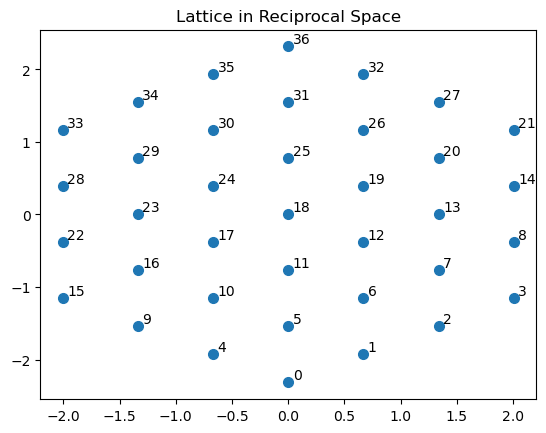

In [3]:
#Define G points in reciprocal space
Gx = []
Gy = []
G_mag = []

Nx = 10
Ny = Nx
N = Nx

#radius of G-points
R = 3*1.01*b
#K = 10
K = R

#selecting G-point index
nu = 1

for i in range(-N, N+1):
    for j in range(-N, N+1):
        Gnmx = i*b1[0] + j*b2[0]
        Gnmy = i*b1[1] + j*b2[1]
        Gnm = np.sqrt(Gnmx**2 + Gnmy**2)

        if Gnm < R:
            Gx.append(Gnmx)
            Gy.append(Gnmy)
            G_mag.append(Gnm)

#-------------------------------------------------------------------------------------------------
Gxarr = np.array(Gx)
Gyarr = np.array(Gy)
         
#GRAPH
#show something
print('Number of G points = ', len(Gx))
dtn = 0.04
plt.plot(Gxarr, Gyarr, 'o', markersize = 7)
for i in range(len(Gxarr)):
    plt.text(Gxarr[i]+dtn, Gyarr[i]+dtn, str(i), size = 10, color = 'black')
plt.title('Lattice in Reciprocal Space')
plt.show()           

### Find the minimum distance for selected G-point (variable name = nu)

In [4]:
dim = len(Gx)
dx = np.zeros((dim, dim), dtype = float)
dy = np.zeros((dim, dim), dtype = float)
d = np.zeros((dim, dim), dtype = float)
p = []
for i in range(dim):
    for j in range(dim):
        if i != j:
            dx[i][j] = Gx[i] - Gx[j]
            dy[i][j] = Gy[i] - Gy[j]
            d2 = (dx[i][j])**2 + (dy[i][j])**2
            dd = np.sqrt(d2)
            d[i][j] = dd
            p.append(dd)

#the minimum distance
p_min = min(p)

#Find the minimum distance at a specific G points¶
G_idx = []
Gix = []
Giy = []

#the questioned G
q = nu

for i in range(len(Gx)):
    Gx0i = Gx[q] - Gx[i]
    Gy0i = Gy[q] - Gy[i]
    GG = np.sqrt((Gx0i)**2 + (Gy0i)**2)   
    
    #find the six nearest neighbour
    a = GG - p_min
    
    #find the index of the six nearest neighbour
    if np.absolute(a) <= 1e-7:
        G_idx.append(i)
        
        Gix.append(Gx[i])
        Giy.append(Gy[i])

#adding the questioned G on the list
Gix.append(Gx[q])
Giy.append(Gy[q])
G_idx.append(q)

#combine everything into one list
G = [G_idx, Gix, Giy]
print("G-point:", nu, ", the nearest neighbours are:", G[0])

G-point: 1 , the nearest neighbours are: [0, 2, 5, 6, 1]


### Define the index at the center in reciprocal lattice

the center is:
11 0.0 -0.7721163628406579
12 0.6686723848976529 -0.38605818142032894
17 -0.6686723848976529 -0.38605818142032894
18 0.0 0.0
19 0.6686723848976529 0.38605818142032894
24 -0.6686723848976529 0.38605818142032894
25 0.0 0.7721163628406579


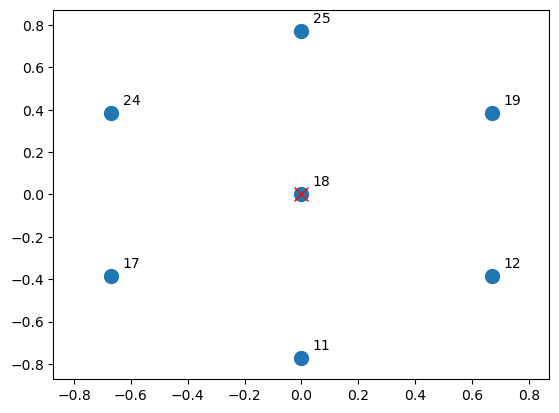

In [5]:
idx = []
ll = p_min+0.1
print("the center is:")
for i in range(len(Gx)):
    if np.absolute(Gx[i]) < ll and np.absolute(Gy[i]) < ll:
        idx.append(i)
        print(i, Gx[i], Gy[i])
        plt.text(Gxarr[i]+dtn, Gyarr[i]+dtn, str(i), size = 10)

#-------------------------------------------------------------------------------------------------
num = idx[3]
plt.plot(Gx, Gy, 'o', markersize = 10)
plt.plot(Gx[num], Gy[num], 'rx', markersize=10)
plt.xlim([-ll, ll])
plt.ylim([-ll, ll])
plt.show()

### Define k points - wave vectors in reciprocal lattice

In [6]:
kx = []
ky = []
k_mag = []

kxme = []
kyme = []

Gb12 = idx[6]
Gb1 = idx[5]
Gb2 = idx[4]
Gb0 = idx[3]
Gb2_inver = idx[2]
Gb1_inver = idx[1]
Gb12_inver = idx[0]

for k in range(0,Nx):
    for l in range(0,Ny):
        kijx = k*b1[0]/Nx + l*b2[0]/Ny
        kijy = k*b1[1]/Nx + l*b2[1]/Ny
        knm = np.sqrt(kijx**2 + kijy**2)

        if knm < K:
            #save for fraphic
            kxme.append(kijx)
            kyme.append(kijy)
            
            #moving k point
            yl1 = -(Gx[Gb1]/Gy[Gb1])*kijx + (Gx[Gb1]**2 + Gy[Gb1]**2)/(2*Gy[Gb1])
            yl2 = -(Gx[Gb2]/Gy[Gb2])*kijx + (Gx[Gb2]**2 + Gy[Gb2]**2)/(2*Gy[Gb2])
            
            if kijy > 1.01*Gy[Gb12]/2 or kijy > 1.01*yl1 or kijy > 1.01*yl2:
                kijy = kijy - Gy[Gb12]/2
                kijx = kijx + Gx[Gb2]
            
            xl1 = -(Gy[Gb1]/Gx[Gb1])*kijy - (Gy[Gb1]**2 + Gx[Gb1]**2)/(2*Gx[Gb1])
            xl2 = -(Gy[Gb2]/Gx[Gb2])*kijy + (Gy[Gb2]**2 + Gx[Gb2]**2)/(2*Gx[Gb2])
            
            if kijx >= 1.01*xl2 or kijx >= 1.01*xl1:
                kijy = kijy - Gy[Gb12]/2 
                kijx = kijx - Gx[Gb2] 
            
            yp1 = -(Gx[Gb1]/Gy[Gb1])*kijx - (Gx[Gb1]**2 + Gy[Gb1]**2)/(2*Gy[Gb1])
            
            if kijy <= 1.01*Gy[Gb12_inver]/2 or kijy < 0.99*yp1:
                kijy = kijy + Gy[Gb12]/2
                kijx = kijx - Gx[Gb2] 

            knm_new = np.sqrt(kijx**2 + kijy**2)    
            kx.append(kijx)
            ky.append(kijy)
            k_mag.append(knm_new)

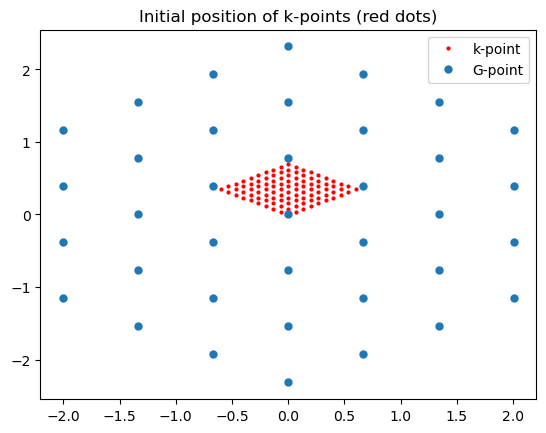

In [7]:
#plot graph
plt.plot(kxme, kyme, 'ro', markersize = 2, label='k-point')
plt.plot(Gx, Gy, 'o', markersize = 5, label='G-point')
plt.legend()
plt.title('Initial position of k-points (red dots)')
plt.show()

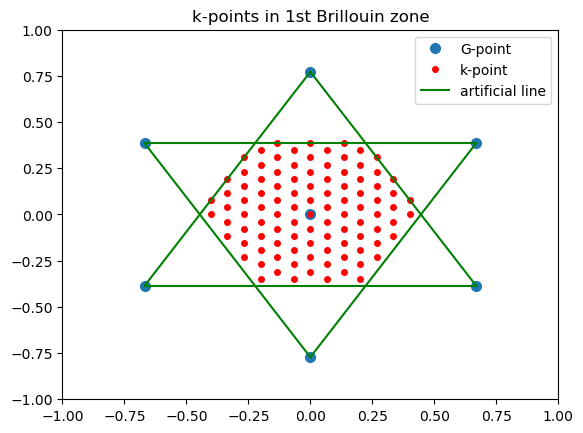

In [8]:
#plot brillouin lines
leng = 150

x1 = np.linspace(Gx[Gb2_inver], Gx[Gb12], leng)
y1 = np.linspace(Gy[Gb2_inver], Gy[Gb12], leng)

x2 = np.linspace(Gx[Gb1], Gx[Gb2], leng)
y2 = np.linspace(Gy[Gb1], Gy[Gb2], leng)

x3 = np.linspace(Gx[Gb12], Gx[Gb1_inver], leng)
y3 = np.linspace(Gy[Gb12], Gy[Gb1_inver], leng)

x4 = [Gx[Gb2], Gx[Gb12_inver]]
y4 = [Gy[Gb2], Gy[Gb12_inver]]

x5 = [Gx[Gb1_inver], Gx[Gb2_inver]]
y5 = [Gy[Gb1_inver], Gy[Gb2_inver]]

x6 = [Gx[Gb12_inver], Gx[Gb1]]
y6 = [Gy[Gb12_inver], Gy[Gb1]]

#-------------------------------------------------------------------------------------------------
#GRAPH
#show something
plt.plot(Gx, Gy, 'o', markersize = 7, label='G-point')
plt.plot(kx, ky, 'ro', markersize = 4, label='k-point')
plt.plot(Gx[q], Gy[q], 'x', markersize = 7)

#brillouin lines
plt.plot(x1, y1, 'g', label='artificial line')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'g')
plt.plot(x4, y4, 'g')
plt.plot(x5, y5, 'g')
plt.plot(x6, y6, 'g')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend()
plt.title('k-points in 1st Brillouin zone')
plt.show()

### Build the Hamiltonian Matrix
Build the Hamiltonian with minimum distance only

In [9]:
dimH = len(Gx)
#exp(i*pi) = cos(pi) + i sin(pi)
#phi = 35*np.pi/180.0
exp_phi = complex(np.cos(phi), 0) + complex(0, np.sin(phi))

#for phase
vb1 = v*exp_phi
vb2 = v*exp_phi
vb12 = v*exp_phi

#Hamiltonian matrix
H = np.zeros((dimH, dimH), dtype = complex)

#the requirement for non-diagonal parts
for i in range(dimH):
    for j in range(dimH):
        if i != j:
            dGx = Gx[i] - Gx[j] 
            dGy = Gy[i] - Gy[j]
            dG = np.sqrt(dGx**2 + dGy**2)
            
            dif = dG - p_min
            #print(i, j, dif)
            if dif <= 1e-7:
                if j == i+1:
                    H[i][j] = vb2
                elif j == i-1:
                    H[i][j] = np.conjugate(vb2)
                elif np.absolute(dGx) <= 1e-7 and j > i:
                    H[i][j] = np.conjugate(vb12)
                elif np.absolute(dGx) <= 1e-7 and j < i:
                    H[i][j] = vb12
                elif j > i:
                    H[i][j] = vb1
                elif j < i:
                    H[i][j] = np.conjugate(vb1)
#savetxt('/home/robiatul/Documents/koding/h_cek.csv', H, delimiter=',')
print('len(H) = ', len(H))

#-------------------------------------------------------------------------------------------------
#Check symmetricity
co = 0
for i in range(dimH):
    for j in range(dimH):
        if i != j:
            if H[i][j] != 0.0:
                dif = H[i][j] + H[j][i]
                if np.absolute(dif.imag) <= 1e-10:
                    co += 1
                    #print(co, "  ", i, j, round(H[i][j].imag,3), round(H[j][i].imag,3), "    ", dif.imag)
                else:
                    print(co, "  ", i, j, round(H[i][j].imag,3), round(H[j][i].imag,3), "    ", dif.imag)

len(H) =  37


### Build a Function for defining the non-diagonal parts of hamiltonian
a = index </br>
c = constant

In [10]:
def fH(a, kx_, ky_, Gx_, Gy_, H_):
    #c = 108.8 #in meV*nanometer**2
    dimH = len(H_)
    mid = np.zeros((dimH, dimH), dtype = complex)
    k = kx_[a]**2 + ky_[a]**2
    
    #constant in diagonal parts
    #in meV*nanometer**2
    jto_mev = 6.242e21
    hbar = 1.0546e-34
    me = 9.1094e-31
    mr = 0.35*me
    mto_nano = 1.0e9

    #calculate
    c = hbar**2/(2*mr)
    c = c*jto_mev
    c = c*(mto_nano**2)
    
    for i in range(dimH):
        G = Gx_[i]**2 + Gy_[i]**2
        mid[i][i] = -c*(k + G + 2*kx_[a]*Gx_[i] + 2*ky_[a]*Gy_[i])
        H_[i][i] = mid[i][i]
    return H_

#-------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------
#try
#Hi = fH(2, kx, ky, Gx, Gy, H)
#savetxt('/home/robiatul/Documents/koding/h_diag_cek.csv', Hi, delimiter=',')
#Hi

### Calculate the  Hamiltonian Matrix and Energy

In [11]:
lk = len(kx)
idx2 = np.zeros((lk), dtype = int)
energy_max = np.zeros((lk, lk), dtype = float)
energy_max1d = np.zeros((lk), dtype = float)

for l in range(lk):
    Hi = fH(l, kx, ky, Gx, Gy, H)
    w, v = la.eig(Hi)
    energy_max[l][l] = max(w.real)
    energy_max1d[l] = max(w.real)
    idx2[l] = np.argmax(w)
    #eigenvectors
    #vi = v[:, idx2]
    #savetxt('/home/robiatul/Documents/koding/hexagonal_data/hamilton' + str(l) +'.csv', Hi, delimiter=',')
#savetxt('/home/robiatul/Documents/koding/hexagonal_data/energy_max.csv', energy_max, delimiter=',')
#print(idx2)

### Plot Graph

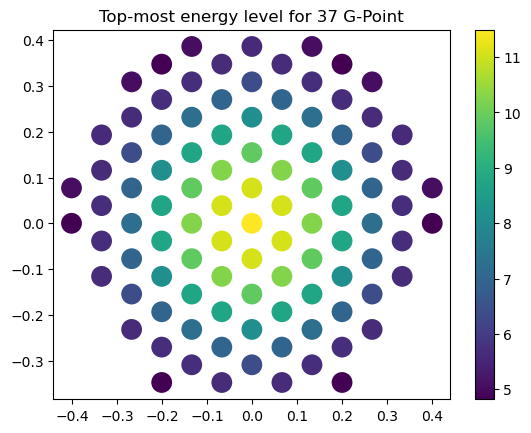

In [12]:
plt.scatter(kx, ky, c=energy_max1d, alpha=1, linewidth=9)
plt.colorbar()
plt.title('Top-most energy level for '+str(len(Gx))+' G-Point')
plt.show()

### Create real space with number of lattice = 100

Number of lattice =  100


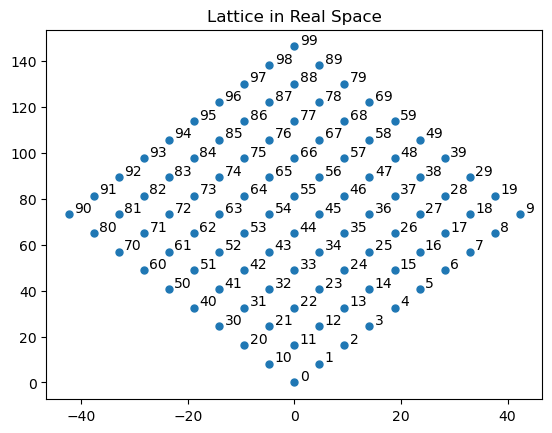

In [13]:
a1 = am*np.array([-1/2, np.sqrt(3)/2])
a2 = am*np.array([1/2, np.sqrt(3)/2])

Rx = []
Ry = []
R_mag = []

for i in range(N):
    for j in range(N):
        Rnmx = i*a1[0] + j*a2[0]
        Rnmy = i*a1[1] + j*a2[1]
        Rnm = np.sqrt(Rnmx**2 + Rnmy**2)

        Rx.append(Rnmx)
        Ry.append(Rnmy)
        R_mag.append(Rnm)

#-------------------------------------------------------------------------------------------------
Rxarr = np.array(Rx)
Ryarr = np.array(Ry)

print('Number of lattice = ', len(Rx))
for i in range(len(Rxarr)):
    plt.text(Rxarr[i]+1, Ryarr[i]+1, str(i), size = 10, color = 'black')
plt.plot(Rx, Ry, 'o', markersize = 5)
plt.title('Lattice in Real Space')
plt.show()           

### sorting the nearest 3 neighbors of lattice in real space into dR[0], dR[1], dR[2]

In [14]:
dR = []
for i in range(1, len(Rxarr)):
    dRx = Rx[i] - Rx[0]
    dRy = Ry[i] - Rx[0]
    dR0 = np.sqrt(dRx**2 + dRy**2)
    
    dR.append(dR0)
list.sort(dR)
dR = np.unique(dR)

print('\t distance \t index')
#deciding which variable we use
for i in range(1, len(Rxarr)):
    dRx = Rx[i] - Rx[0]
    dRy = Ry[i] - Rx[0]
    dR1 = np.sqrt(dRx**2 + dRy**2)
    
    if np.abs(dR1 - dR[0]) <= 10e-3:
        dR1_idx = i
        print('1st: ', dR1, '\t', dR1_idx)
        break
for i in range(1, len(Rxarr)):
    dRx = Rx[i] - Rx[0]
    dRy = Ry[i] - Rx[0]
    dR2 = np.sqrt(dRx**2 + dRy**2)
    
    if np.abs(dR2 - dR[1]) <= 10e-3:
        dR2_idx = i
        print('2nd:', dR2, '\t', dR2_idx)
        break
for i in range(1, len(Rxarr)):
    dRx = Rx[i] - Rx[0]
    dRy = Ry[i] - Rx[0]
    dR3 = np.sqrt(dRx**2 + dRy**2)
    
    if np.abs(dR3 - dR[2]) <= 10e-3:
        dR3_idx = i
        print('3rd:', dR3, '\t', dR3_idx)
        break

	 distance 	 index
1st:  9.3965078401455 	 1
2nd: 16.2752289928513 	 11
3rd: 18.793015680291 	 2


In [15]:
#with number of k-points = 100
#here's the same calculation as above but in this part we already decide to check
#the nearest neighbors of lattice with index number o = 0.
o, n1 = 0, dR1_idx
n2 = dR2_idx
n3 = dR3_idx

dx1 = Rx[n1] - Rx[o]
dy1 = Ry[n1] - Ry[o]
d1 = np.sqrt(dx1**2 + dy1**2)

dx2 = Rx[n2] - Rx[o]
dy2 = Ry[n2] - Ry[o]
d2 = np.sqrt(dx2**2 + dy2**2)

dx3 = Rx[n3] - Rx[o]
dy3 = Ry[n3] - Ry[o]
d3 = np.sqrt(dx3**2 + dy3**2)

print('index: ', o, ', neighbors: ', d1, d2, d3)

index:  0 , neighbors:  9.3965078401455 16.2752289928513 18.793015680291


### The energy of 1st, 2nd, 3rd nearest neighbors t (hopping energy in tight-binding model)

In [16]:
t1 = np.zeros(len(kx), dtype = complex)
t2 = np.zeros(len(kx), dtype = complex)
t3 = np.zeros(len(kx), dtype = complex)

for i in range(len(kx)):
    k1 = kx[i]*Rx[n1] - kx[i]*Rx[o] + ky[i]*Ry[n1] - ky[i]*Ry[o]
    k2 = kx[i]*Rx[n2] - kx[i]*Rx[o] + ky[i]*Ry[n2] - ky[i]*Ry[o]
    k3 = kx[i]*Rx[n3] - kx[i]*Rx[o] + ky[i]*Ry[n3] - ky[i]*Ry[o]
    
    t1[i] = energy_max1d[i]*np.exp(complex(0, k1))
    t2[i] = energy_max1d[i]*np.exp(complex(0, k2))
    t3[i] = energy_max1d[i]*np.exp(complex(0, k3))
    
t1 = t1/len(kx)
t2 = t2/len(kx)
t3 = t3/len(kx)

print('sum of 1st nearest neighbor t1', sum(t1), 'abs t1 = ', np.absolute(sum(t1)), '\n', 
      'sum of 2nd nearest neighbor t2', sum(t2), 'abs t2 = ', np.absolute(sum(t2)), '\n', 
      'sum of 3rd nearest neighbor t3', sum(t3), 'abs t3 = ', np.absolute(sum(t3)),)

sum of 1st nearest neighbor t1 (0.7828988349189845+1.7763568394002505e-15j) abs t1 =  0.7828988349189845 
 sum of 2nd nearest neighbor t2 (-0.06053396849889931+4.551914400963142e-15j) abs t2 =  0.06053396849889931 
 sum of 3rd nearest neighbor t3 (-0.035504179702225615-3.4139358007223564e-15j) abs t3 =  0.035504179702225615


### Calculating energy total / number of k

In [17]:
#Define the real space lattice vector 2D: a1, a2
a1 = am*np.array([-1/2, np.sqrt(3)/2])
a2 = am*np.array([1/2, np.sqrt(3)/2])

aa1 = a1[0]**2 + a1[1]**2
A1 = np.sqrt(aa1)

aa2 = a2[0]**2 + a2[1]**2
A2 = np.sqrt(aa2)

aa12 = (a1[0]-a2[0])**2 + (a1[1]-a2[1])**2
A12 = np.sqrt(aa12)

for i in range(len(kx)):
    k = kx[i]**2 + ky[i]**2
    k = np.sqrt(k)
    
    #calculating epsilon in tight-binding model
    ek = (2*t1*[np.cos(k*A1) + np.cos(k*A2) + np.cos(k*A12)] 
        + 2*t2*[np.cos(k*A1) + np.cos(k*A2) + np.cos(k*A12)] 
        + 2*t3*[np.cos(k*A1) + np.cos(k*A2) + np.cos(k*A12)])
    ek = (2*t1*[np.cos(kx[i]*a1[0]) + np.cos(kx[i]*a2[0]) + np.cos(k*A12)] 
        + 2*t2*[np.cos(k*A1) + np.cos(k*A2) + np.cos(k*A12)] 
        + 2*t3*[np.cos(k*A1) + np.cos(k*A2) + np.cos(k*A12)])
    
print(sum(ek), sum(energy_max1d/len(kx)))

(3.8719458333980286+1.2656542480726785e-14j) 7.2955819215533415


### Summary of all the paramaters already known:

In [18]:
print('Emax = ', max(energy_max1d), '\nEmin = ', min(energy_max1d), '\nEsum = ', sum(energy_max1d), 
      '\nEtotal/Nk = ', sum(energy_max1d)/len(kx), '\nG =', len(Gx))

Emax =  11.49510377787356 
Emin =  4.818614473901007 
Esum =  729.5581921553344 
Etotal/Nk =  7.295581921553344 
G = 37
